In [64]:
setwd("/root/workspace/code/sc-transformer")
source("/root/workspace/code/sc-transformer/preprocess/utils.R")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
library(scales)
library(reshape)


In [65]:

f1 <- as.data.frame(read.xls("result/downstream/metrics/dogma_metrics.xlsx"))
f1 <- melt(f1, id = "Method")[-1]
names(f1) <- c("Task", "Micro F1-score")

In [66]:
f1[["Task"]] <- paste0("dogma-", f1[["Task"]])
f1[["Task"]] <- str_replace_all(f1[["Task"]], c("_" = "-",
                                                "paired-full" = "paired+full",
                                                "diagonal-full" = "diagonal+full"
                                                ))

In [67]:
f1[["Task"]] <- factor(x = f1[["Task"]], levels = rev(c(
    "dogma-full",
    "dogma-paired+full",
    "dogma-paired-abc",
    "dogma-paired-ab",
    "dogma-paired-ac",
    "dogma-paired-bc",
    "dogma-diagonal+full",
    "dogma-diagonal")))
f1

Task,Micro F1-score
<fct>,<dbl>
dogma-full,1.0000000
dogma-paired+full,0.9275512
dogma-paired-abc,0.9290371
dogma-paired-ab,0.8848825
dogma-paired-ac,0.9125398
dogma-paired-bc,0.9432297
dogma-diagonal+full,0.8953146
dogma-diagonal,0.5552995


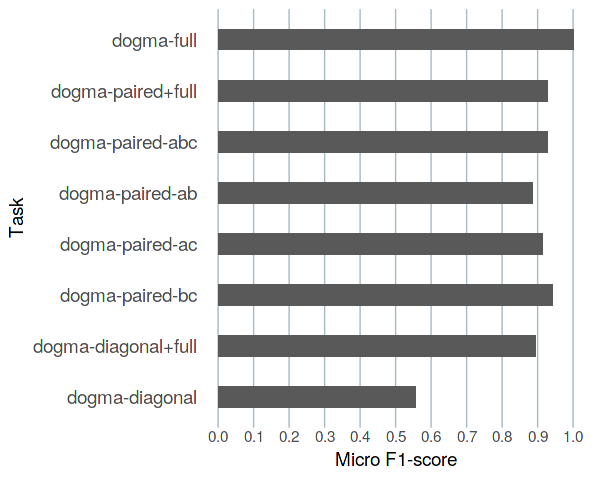

In [68]:
p <- ggplot(data = f1, aes(y = .data[["Task"]],
                           x = .data[["Micro F1-score"]], width = 0.4)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.5 + 0.15)) +
scale_fill_brewer(palette = "Set1") +
  scale_x_continuous(
    limits = c(0, 1), oob = rescale_none,
    breaks = seq(0, 1, by = 0.1),
    # expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) + theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.x = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    axis.text.y = element_text(size = 11))

w <- 5
h <- 4
plt_size(w, h)
p


In [69]:

outdir <- "paper/3"
mkdir(outdir, remove_old = F)
ggsave(plot = p, file = pj(outdir, "3f_mosaic_label_consistency.png"), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, "3f_mosaic_label_consistency.pdf"), width = w, height = h, limitsize = F)